In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import mibian
import numpy as np
import scipy as sp

## Matlabplot Display Parameters

In [2]:
# Display Plot within Jupyter Notebook
%matplotlib inline
# Default Plot Size
plt.rcParams['figure.figsize'] = [10, 10]

## Load Vix Historical File
This file was loaded from [here](https://finance.yahoo.com/quote/%5EVIX/history/)

In [3]:
# Data File Location
vix_data = os.getenv('HOMEDRIVE') + '/Documents/platypus/vix/vix_20200509.csv'
# Load File into Dataframe
vix_df = pd.read_csv(vix_data)
# Convert Date Field to Datetime Object
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
# Set Index to Date Field
vix_df.set_index(['Date'], inplace=True)

## Load Citi Historical File
This file was loaded from [here](https://finance.yahoo.com/quote/C/history?period1=1575849600&period2=1588982400&interval=1d&filter=history&frequency=1d)

In [4]:
# Data File Location
citi_data = os.getenv('HOMEDRIVE') + '/Documents/platypus/citi/citi_20200509.csv'
# Load File into Dataframe
citi_df = pd.read_csv(citi_data)
# Convert Date Field to Datetime Object
citi_df['Date'] = pd.to_datetime(citi_df['Date'])
# Set Index to Date Field
citi_df.set_index(['Date'], inplace=True)

## Calculate Historical Volatility
The historical volatility calculation was taken from [here](https://www.investopedia.com/ask/answers/021015/how-can-you-calculate-volatility-excel.asp)

In [5]:
def return_on_price(current_price, previous_price):
    return (current_price/previous_price) - 1

citi_df['Adj Close Shift'] = citi_df['Adj Close'].shift(1)
citi_df['Adj Close Price Return'] = citi_df.apply(lambda row : return_on_price(row['Adj Close'], row['Adj Close Shift']), axis = 1)
citi_df['Rolling Volatility'] = np.sqrt(30) * citi_df['Adj Close Price Return'].rolling(30).std() * 100

## Visualization of VIX and Citi

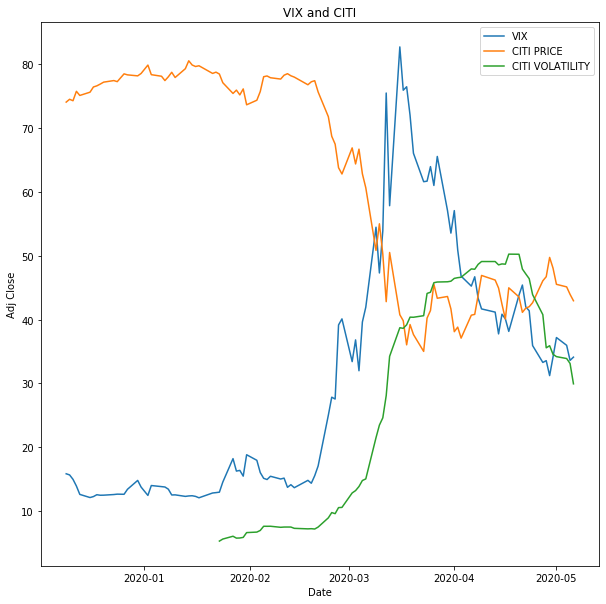

In [172]:
plt.plot(vix_df['Adj Close'], label="VIX")
plt.plot(citi_df['Adj Close'], label="CITI PRICE")
plt.plot(citi_df['Rolling Volatility'], label="CITI VOLATILITY")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('VIX and CITI')
plt.legend()
plt.show()

## Getting the Range of Key Variables

In [7]:
vix_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.0
mean,30.862913,33.409515,28.370874,30.703107,30.703107,0.0
std,19.385441,21.586109,17.178581,19.344769,19.344769,0.0
min,12.200000,12.420000,11.710000,12.100000,12.100000,0.0
25%,14.340000,15.190000,13.385000,13.820000,13.820000,0.0
50%,22.250000,26.350000,22.000000,25.030001,25.030001,0.0
75%,43.584999,45.730000,41.004999,41.959999,41.959999,0.0
max,82.690002,85.470001,70.370003,82.690002,82.690002,0.0


In [173]:
citi_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Shift,Adj Close Price Return,Rolling Volatility
count,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02,102.000000,102.000000,73.000000
mean,63.290194,64.287767,62.115534,63.117379,62.293177,2.248350e+07,62.482816,-0.003887,27.364790
std,16.762783,16.380995,17.343187,16.860557,16.495874,1.175525e+07,16.464118,0.053595,17.444448
min,35.470001,37.990002,32.000000,35.389999,35.018318,4.576200e+06,35.018318,-0.192986,5.321289
25%,44.330000,45.605000,42.944999,44.170000,43.872580,1.169080e+07,44.198245,-0.025153,7.638068
50%,73.379997,74.050003,72.440002,72.529999,71.768257,2.397070e+07,72.698387,-0.002408,33.129572
75%,78.709999,79.050003,78.230000,78.725002,77.537644,3.177400e+07,77.596706,0.012014,45.882190
max,81.959999,83.110001,80.970001,81.910004,80.515900,5.165000e+07,80.515900,0.179843,50.245917


## Scaling Vix, Citi Price, Citi Volatility

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()

In [11]:
vix_scaled = min_max_scaler.fit_transform(vix_df[['Adj Close']])

In [12]:
index = vix_df.index
vix_scaled = pd.DataFrame(vix_scaled, index=index)

In [13]:
citivol_scaled = min_max_scaler.fit_transform(citi_df[['Rolling Volatility']])

In [14]:
index = citi_df.index
citivol_scaled = pd.DataFrame(citivol_scaled, index=index)

In [15]:
citiprice_scaled = min_max_scaler.fit_transform(citi_df[['Adj Close']])

In [174]:
citiprice_scaled = pd.DataFrame(citiprice_scaled, index=index)

## VIX vs CITI Price vs CITI Volatility 

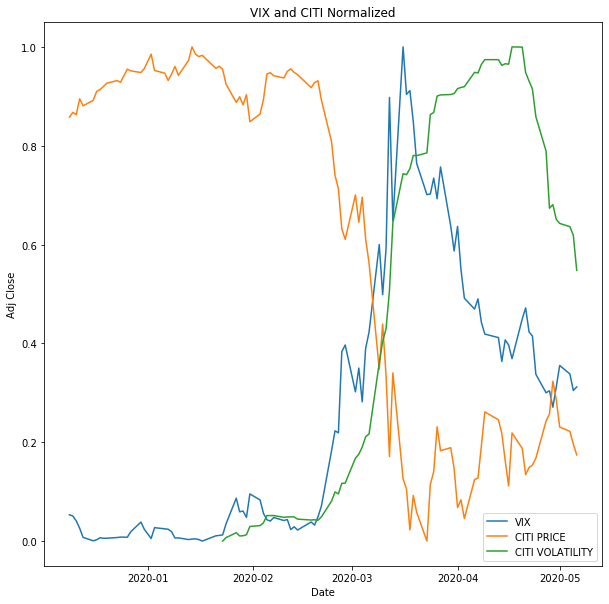

In [175]:
plt.plot(vix_scaled, label="VIX")
plt.plot(citiprice_scaled, label="CITI PRICE")
plt.plot(citivol_scaled, label="CITI VOLATILITY")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('VIX and CITI Normalized')
plt.legend()
plt.show()

## Investigating Correlation

In [18]:
scaled_data = [pd.DataFrame(citiprice_scaled), pd.DataFrame(citivol_scaled), pd.DataFrame(vix_scaled)]

In [47]:
df_scaled = pd.concat(scaled_data, axis =1, join='outer', ignore_index=False, keys=['citiprice_scaled', 'citivol_scaled', 'vix_scaled'],
          levels=None, names=None, verify_integrity=False, copy=True)

In [48]:
df_scaled = df_scaled.dropna(axis='rows')

In [176]:
df_scaled.corr()

,,citiprice_scaled,citivol_scaled,vix_scaled
,,0,0,0
citiprice_scaled,0,1.000000,-0.944742,-0.842124
citivol_scaled,0,-0.944742,1.000000,0.718076
vix_scaled,0,-0.842124,0.718076,1.000000


## Fitting Data Using Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [177]:
lr = LinearRegression()

### CITI Price vs CITI Volatility

In [179]:
X = df_scaled['citiprice_scaled']
y = df_scaled['citivol_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [180]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, X_train))

Coefficients: 
 [[-1.05209772]]
Mean squared error: 0.55
Coefficient of determination: -2.59


In [182]:
citivol_y_pred = lr.predict(X_test)

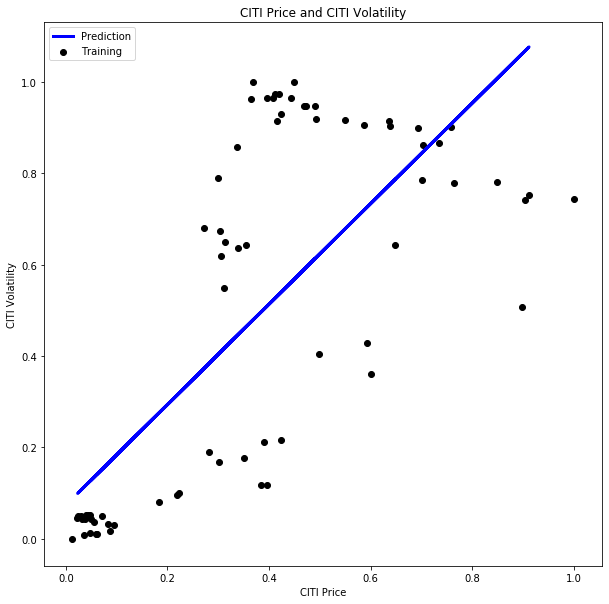

In [192]:
plt.scatter(X,y, color='black', label='Training')
plt.plot(X_test, citivol_y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('CITI Price')
plt.ylabel('CITI Volatility')
plt.title('CITI Price and CITI Volatility')
plt.legend()
plt.show()

### VIX vs CITI Volatility

In [187]:
# vix vs citi vol
X = df_scaled['vix_scaled']
y = df_scaled['citivol_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [188]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, X_train))

Coefficients: 
 [[1.10131676]]
Mean squared error: 0.08
Coefficient of determination: 0.50


In [190]:
citivol_y_pred = lr.predict(X_test)

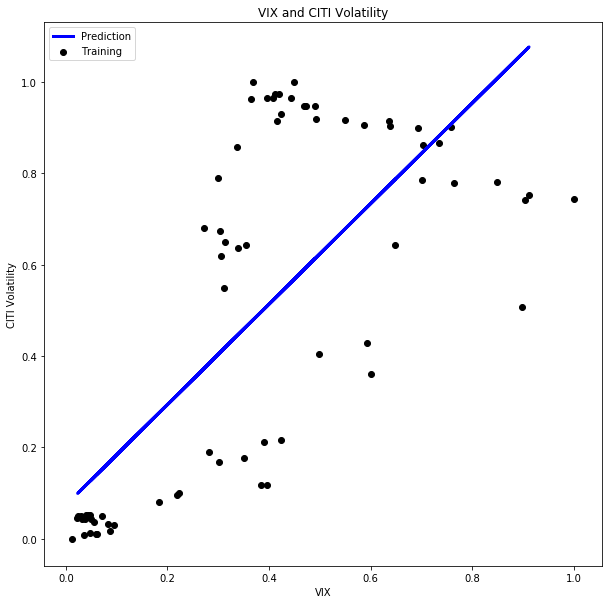

In [191]:
plt.scatter(X,y, color='black', label='Training')
plt.plot(X_test, citivol_y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('VIX')
plt.ylabel('CITI Volatility')
plt.title('VIX and CITI Volatility')
plt.legend()
plt.show()

### VIX vs CITI Price

In [194]:
# vix vs citi price
X = df_scaled['vix_scaled']
y = df_scaled['citiprice_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [195]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, X_train))

Coefficients: 
 [[-1.15024311]]
Mean squared error: 0.36
Coefficient of determination: -2.03


In [197]:
citiprice_y_pred = lr.predict(X_test)

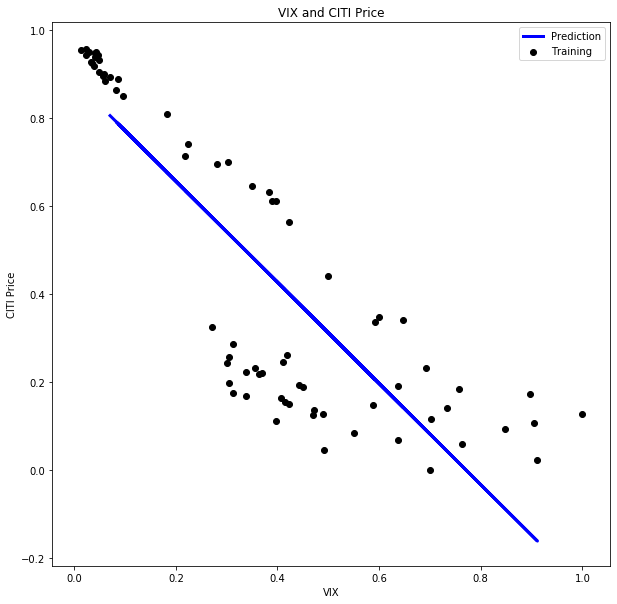

In [198]:
plt.scatter(X,y, color='black', label='Training')
plt.plot(X_test, citiprice_y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('VIX')
plt.ylabel('CITI Price')
plt.title('VIX and CITI Price')
plt.legend()
plt.show()